<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Labeled" data-toc-modified-id="Labeled-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Labeled</a></span></li><li><span><a href="#Categorical" data-toc-modified-id="Categorical-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Categorical</a></span></li><li><span><a href="#vote" data-toc-modified-id="vote-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>vote</a></span></li><li><span><a href="#other-variables" data-toc-modified-id="other-variables-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>other variables</a></span></li><li><span><a href="#Visualization" data-toc-modified-id="Visualization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualization</a></span></li></ul></div>

# Setup

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
pd.options.display.max_colwidth=300
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
colors = ['r', 'b']
colors_3 = ['r', 'b', '#808080']
colorm = ['C2', 'gold', 'darkorange', 'orchid', 'c', 'C7', 'C6', 'C5', 'C9', 'm', 'g', 'y', 'dimgrey']

In [3]:
plt.rc('font', size=16)

# Reading Data

Cooperative Congressional Election Survey (CCES) 2016 <br>
https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910/DVN/GDF6Z0

In [4]:
cces = pd.io.stata.StataReader('CCES16_Common_OUTPUT_Feb2018_VV.dta')
df = cces.read(convert_categoricals=False) # categorical variables are coded with integers

In [5]:
cces = pd.io.stata.StataReader('CCES16_Common_OUTPUT_Feb2018_VV.dta')
dfc = cces.read(convert_categoricals=True) # categorical variables are coded with strings

In [6]:
df.shape

(64600, 563)

In [7]:
var_label = cces.variable_labels()
var_label

{'V101': 'Case ID',
 'commonweight_vv': 'Common content with voter validation weights',
 'commonweight_vv_post': 'Common content with voter validation weights post-election',
 'commonweight_vv_lgbt': 'Weights for LGBT variable analysis',
 'commonweight': 'Common content weights',
 'commonweight_post': 'Common content weights post-election',
 'tookpost': 'Took post-election wave',
 'lookupzip': 'Zip code for mapping CD',
 'inputstate': 'State',
 'cdid113': 'CD 113th/114th Congress',
 'cdid115': 'CD 115th Congress',
 'countyfips': 'County FIPS code',
 'countyname': 'County Name',
 'CurrentGovName': 'Current Governor Name',
 'CurrentGovParty': 'Current Governor Party',
 'CurrentHouseGender': 'Current House Gender',
 'CurrentHouseName': 'Current House Name',
 'CurrentHouseParty': 'Current House Party',
 'CurrentSen1Gender': 'Current Senate 1 Gender',
 'CurrentSen1Name': 'Current Senate 1 Name',
 'CurrentSen1Party': 'Current Senate 1 Party',
 'CurrentSen2Gender': 'Current Senate 2 Gender',


In [8]:
# some systematic overview

v_dem = ['birthyr', 'gender', 'educ', 'race', 'immstat', 'CC16_361', 'citylength_1',
         'employ', 'hadjob', 'industryclass', 'ownhome', 'faminc', 'investor', 'edloan',
         'child18', 'child18num', 'marstat',
         'pew_bornagain', 'pew_religimp', 'pew_churatd', 'pew_prayer', 'religpew',
         'milstat_1', 'milstat_2', 'milstat_3', 'milstat_4', 'milstat_5',
         'union', 'unionhh', 'newsint', 'internethome',
         'healthins_1', 'healthins_2', 'healthins_3', 'healthins_4', 'healthins_5', 'healthins_6']

v_perception = ['CC16_302', 'CC16_304',
                'CC16_427_a', 'CC16_427_b', 'CC16_427_c', 'CC16_427_d', 'CC16_427_e', 'CC16_427_f']

v_past_four = ['CC16_303', 'CC16_305_1', 'CC16_305_2', 'CC16_305_3', 'CC16_305_4', 'CC16_305_5',
                  'CC16_305_6', 'CC16_305_7', 'CC16_305_8', 'CC16_305_9', 'CC16_305_10', 'CC16_305_11']

v_opinion = ['CC16_307', 'CC16_330a', 'CC16_330b', 'CC16_330d', 'CC16_330e',
             'CC16_331_1', 'CC16_331_2', 'CC16_331_3', 'CC16_331_7', 'CC16_331_9',
             'CC16_332a', 'CC16_332b', 'CC16_332c', 'CC16_332d', 'CC16_332e', 'CC16_332f',
             'CC16_333a', 'CC16_333b', 'CC16_333c', 'CC16_333d',
             'CC16_334a', 'CC16_334b', 'CC16_334c', 'CC16_334d', 'CC16_335',
             'CC16_337_1', 'CC16_337_2', 'CC16_337_3',
             'CC16_351B', 'CC16_351E', 'CC16_351F', 'CC16_351G', 'CC16_351H', 'CC16_351I', 'CC16_351K',
             'CC16_414_1', 'CC16_414_2', 'CC16_414_3', 'CC16_414_4', 'CC16_414_5', 'CC16_414_6', 'CC16_414_7',
             'CC16_415r', 'CC16_416r', 'CC16_422c', 'CC16_422d', 'CC16_422e', 'CC16_422f',
             'CC16_426_1', 'CC16_426_2', 'CC16_426_3', 'CC16_426_4', 'CC16_426_5']

In [9]:
var_label.get('CC16_302')

'National Economy'

In [10]:
dfc[v_dem].head(3)

,birthyr,gender,educ,race,immstat,CC16_361,citylength_1,employ,hadjob,industryclass,ownhome,faminc,investor,edloan,child18,child18num,marstat,pew_bornagain,pew_religimp,pew_churatd,pew_prayer,religpew,milstat_1,milstat_2,milstat_3,milstat_4,milstat_5,union,unionhh,newsint,internethome,healthins_1,healthins_2,healthins_3,healthins_4,healthins_5,healthins_6
0,1969,Female,High school graduate,White,Third generation,5 or more years,9.0,Homemaker,No,NaN,Own,Prefer not to say,No,No,No,NaN,Married,No,Somewhat important,Never,A few times a month,Nothing in particular,No,No,No,Yes,No,"I am not now, nor have I been, a member of a labor union","No, no one in my household has ever been a member of a labor union",Some of the time,Broadband,No,No,No,No,No,Yes
1,1994,Female,High school graduate,White,Third generation,5 or more years,10.0,Homemaker,Yes,Other Services (except Public Administration),Rent,"$50,000 - $59,999",No,No,Yes,1.0,Single,NaN,NaN,NaN,NaN,NaN,No,No,No,Yes,No,"I am not now, nor have I been, a member of a labor union","No, no one in my household has ever been a member of a labor union",Only now and then,Broadband,No,Yes,No,No,No,No
2,1964,Female,High school graduate,Black,Third generation,1 to 2 years,2.0,Permanently disabled,No,NaN,Rent,"$30,000 - $39,999",No,NaN,Yes,3.0,Single,No,Very important,Once or twice a month,A few times a week,Roman Catholic,No,No,No,Yes,No,I formerly was a member of a labor union,"Yes, a member of my household is currently a union member",Some of the time,Broadband,No,Yes,No,No,No,No


In [11]:
df[v_dem].head()

,birthyr,gender,educ,race,immstat,CC16_361,citylength_1,employ,hadjob,industryclass,ownhome,faminc,investor,edloan,child18,child18num,marstat,pew_bornagain,pew_religimp,pew_churatd,pew_prayer,religpew,milstat_1,milstat_2,milstat_3,milstat_4,milstat_5,union,unionhh,newsint,internethome,healthins_1,healthins_2,healthins_3,healthins_4,healthins_5,healthins_6
0,1969,2,2,1,5.0,6.0,9.0,7,2.0,NaN,1.0,97.0,2.0,2.0,2.0,NaN,1.0,2.0,2.0,6.0,5.0,11.0,2,2,2,1,2,3.0,3.0,2.0,1.0,2,2,2,2,2,1
1,1994,2,2,1,5.0,6.0,10.0,7,1.0,22.0,2.0,6.0,2.0,2.0,1.0,1.0,5.0,NaN,NaN,NaN,NaN,NaN,2,2,2,1,2,3.0,3.0,3.0,1.0,2,1,2,2,2,2
2,1964,2,2,2,5.0,4.0,2.0,6,2.0,NaN,2.0,4.0,2.0,NaN,1.0,3.0,5.0,2.0,1.0,3.0,3.0,2.0,2,2,2,1,2,2.0,1.0,2.0,1.0,2,1,2,2,2,2
3,1988,2,2,2,5.0,4.0,2.0,6,1.0,22.0,2.0,1.0,2.0,NaN,1.0,2.0,5.0,2.0,2.0,4.0,3.0,11.0,2,2,2,2,1,3.0,3.0,2.0,1.0,2,1,2,2,2,2
4,1982,2,5,1,5.0,5.0,4.0,2,NaN,19.0,1.0,7.0,1.0,2.0,1.0,2.0,1.0,2.0,4.0,6.0,6.0,10.0,2,2,2,1,2,3.0,3.0,1.0,1.0,1,2,2,2,2,2


# Unweighted Data

## Labeled

dataset with numerical variables (df)

In [12]:
var_label.get('CC16_410a')

'President vote'

In [13]:
df.CC16_410a.value_counts().sort_index()

1.0    18755
2.0    22136
3.0     1829
4.0      913
5.0     1136
6.0       81
7.0      229
8.0      163
Name: CC16_410a, dtype: int64

In [14]:
value_labels = cces.value_labels()
value_labels

{'EDLOAN': {1: 'Yes',
  2: 'No',
  97: 'Other',
  98: "Don't know",
  99: 'None of these',
  998: 'Skipped',
  999: 'Not Asked'},
 'V547_A': {1: 'A - Excellent',
  2: 'B - Above Average',
  3: 'C - Average',
  4: 'D - Below Average',
  5: 'F - Poor',
  6: 'Not applicable',
  8: 'Skipped',
  9: 'Not Asked'},
 'V546_A': {1: 'A - Excellent',
  2: 'B - Above Average',
  3: 'C - Average',
  4: 'D - Below Average',
  5: 'F - Poor',
  6: 'Not applicable',
  8: 'Skipped',
  9: 'Not Asked'},
 'V545_A': {1: 'A - Excellent',
  2: 'B - Above Average',
  3: 'C - Average',
  4: 'D - Below Average',
  5: 'F - Poor',
  8: 'Skipped',
  9: 'Not Asked'},
 'V544_A': {1: 'A - Excellent',
  2: 'B - Above Average',
  3: 'C - Average',
  4: 'D - Below Average',
  5: 'F - Poor',
  8: 'Skipped',
  9: 'Not Asked'},
 'V543_A': {1: 'A - Excellent',
  2: 'B - Above Average',
  3: 'C - Average',
  4: 'D - Below Average',
  5: 'F - Poor',
  8: 'Skipped',
  9: 'Not Asked'},
 'CC16_427': {1: 'A - Excellent',
  2: 'B - 

In [15]:
var_values = cces.lbllist
var_values

['',
 '',
 '',
 '',
 '',
 '',
 'TOOKPOST',
 '',
 'INPUTSTA',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'LABA',
 'COMPTYPE',
 'LABA',
 'VOTEREG',
 'LABA',
 'LABB',
 'LABB',
 'BIRTHYR',
 'GENDER',
 'EDUC',
 'RACE',
 '',
 'LABA',
 'MARSTAT',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 '',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 '',
 'CCESMODU',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'V128_A',
 'V129_A',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABA',
 'LABC',
 'LABC',
 'LABC',
 'LABC',
 'L

In [16]:
value_labels.get(var_values[df.columns.get_loc('CC16_410a')])

{1: 'Donald Trump (Republican)',
 2: 'Hillary Clinton (Democrat)',
 3: 'Gary Johnson (Libertarian)',
 4: 'Jill Stein (Green)',
 5: 'Other',
 6: "I didn't vote in this election",
 7: "I'm not sure",
 8: 'Evan McMullin (Independent)',
 98: 'Skipped',
 99: 'Not Asked'}

In [17]:
# create variable with vote (Trump - Clinton - Other)

df = df.assign(vote=df.CC16_410a)
df.vote.replace([4, 5, 8], 3, inplace=True)
df.vote.replace([6, 7, 98, 99], np.nan, inplace=True)

In [18]:
vote_label = {1: 'Trump', 2: 'Clinton', 3: 'Other'}
df.vote.map(vote_label).value_counts().reindex(vote_label.values())

Trump      18755
Clinton    22136
Other       4041
Name: vote, dtype: int64

In [19]:
# Level of Education (educ)

df.educ.map(value_labels.get(var_values[df.columns.get_loc('educ')])).value_counts().reindex(value_labels.get(var_values[df.columns.get_loc('educ')]).values())

No HS                    1971.0
High school graduate    16381.0
Some college            15685.0
2-year                   7169.0
4-year                  14884.0
Post-grad                8510.0
Skipped                     NaN
Not Asked                   NaN
Name: educ, dtype: float64

In [20]:
# Religion (religpew)

df.religpew.map(value_labels.get(var_values[df.columns.get_loc('religpew')])).value_counts()

Protestant                   22888
Roman Catholic               13880
Nothing in particular        11986
Atheist                       4025
Agnostic                      3993
Something else                3621
Jewish                        1546
Mormon                         870
Buddhist                       621
Muslim                         436
Eastern or Greek Orthodox      362
Hindu                          299
Name: religpew, dtype: int64

In [21]:
# Perception of National Economy in past year

print(var_label.get('CC16_302'))
display(df.CC16_302.value_counts().sort_index())
df.CC16_302.map(value_labels.get(var_values[df.columns.get_loc('CC16_302')])).value_counts().reindex(value_labels.get(var_values[df.columns.get_loc('CC16_302')]).values())

National Economy


1.0     3286
2.0    16472
3.0    21840
4.0    14889
5.0     5978
6.0     2018
Name: CC16_302, dtype: int64

Gotten much better        3286.0
Gotten better            16472.0
Stayed about the same    21840.0
Gotten worse             14889.0
Gotten much worse         5978.0
Not sure                  2018.0
Skipped                      NaN
Not Asked                    NaN
Name: CC16_302, dtype: float64

---

--> Pick two to four variables of your interest and inspect labels and distribution. Have a look at the codebook!

---

## Categorical

dataset with categorical variables (dfc)

In [22]:
dfc.dtypes

V101                             int32
commonweight_vv                float64
commonweight_vv_post           float64
commonweight_vv_lgbt           float64
commonweight                   float64
                             ...      
endtime_pre             datetime64[ns]
starttime_post          datetime64[ns]
endtime_post            datetime64[ns]
dma                            float64
dmaname                         object
Length: 563, dtype: object

In [23]:
dfc[v_dem].dtypes

birthyr          category
gender           category
educ             category
race             category
immstat          category
CC16_361         category
citylength_1     category
employ           category
hadjob           category
industryclass    category
ownhome          category
faminc           category
investor         category
edloan           category
child18          category
child18num       category
marstat          category
pew_bornagain    category
pew_religimp     category
pew_churatd      category
pew_prayer       category
religpew         category
milstat_1        category
milstat_2        category
milstat_3        category
milstat_4        category
milstat_5        category
union            category
unionhh          category
newsint          category
internethome     category
healthins_1      category
healthins_2      category
healthins_3      category
healthins_4      category
healthins_5      category
healthins_6      category
dtype: object

In [24]:
dfc.CC16_410a.value_counts().sort_index() # mapping is not needed

Donald Trump (Republican)         18755
Hillary Clinton (Democrat)        22136
Gary Johnson (Libertarian)         1829
Jill Stein (Green)                  913
Other                              1136
I didn't vote in this election       81
I'm not sure                        229
Evan McMullin (Independent)         163
Name: CC16_410a, dtype: int64

In [25]:
dfc.CC16_410a.head() # note that categories should be unordered for this variable

0     Donald Trump (Republican)
1     Donald Trump (Republican)
2                           NaN
3                           NaN
4    Hillary Clinton (Democrat)
Name: CC16_410a, dtype: category
Categories (8, object): [Donald Trump (Republican) < Hillary Clinton (Democrat) < Gary Johnson (Libertarian) < Jill Stein (Green) < Other < I didn't vote in this election < I'm not sure < Evan McMullin (Independent)]

In [26]:
# create vote variable like above

dfc = dfc.assign(vote=dfc.CC16_410a)

dfc.vote.replace(['Gary Johnson (Libertarian)', 'Jill Stein (Green)', 'Evan McMullin (Independent)'], 'Other', inplace=True)
dfc.vote.cat.remove_categories(["I didn't vote in this election", "I'm not sure"], inplace=True)
dfc.vote.cat.remove_unused_categories(inplace=True)
dfc.vote.cat.rename_categories({'Donald Trump (Republican)': 'Trump', 'Hillary Clinton (Democrat)': 'Clinton'}, inplace=True)
dfc.vote.cat.as_unordered(inplace=True)
dfc.vote.value_counts().sort_index()

Trump      18755
Clinton    22136
Other       4041
Name: vote, dtype: int64

In [27]:
dfc.vote.dtype

CategoricalDtype(categories=['Trump', 'Clinton', 'Other'], ordered=False)

In [28]:
dfc.educ.dtype

CategoricalDtype(categories=['No HS', 'High school graduate', 'Some college', '2-year',
                  '4-year', 'Post-grad'],
                 ordered=True)

In [29]:
display(dfc.religpew.dtype)
dfc.religpew.cat.as_unordered(inplace=True)

CategoricalDtype(categories=['Protestant', 'Roman Catholic', 'Mormon',
                  'Eastern or Greek Orthodox', 'Jewish', 'Muslim', 'Buddhist',
                  'Hindu', 'Atheist', 'Agnostic', 'Nothing in particular',
                  'Something else'],
                 ordered=True)

In [30]:
dfc.CC16_302.dtype

CategoricalDtype(categories=['Gotten much better', 'Gotten better',
                  'Stayed about the same', 'Gotten worse', 'Gotten much worse',
                  'Not sure'],
                 ordered=True)

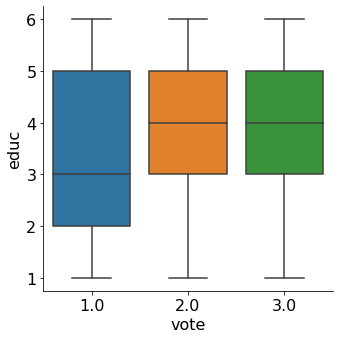

In [31]:
sns.catplot(x='vote', y='educ', kind='box', data=df)

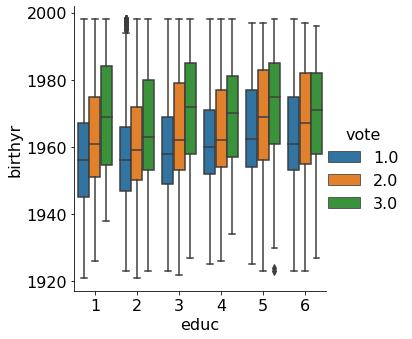

In [32]:
sns.catplot(x='educ', y='birthyr', hue='vote', kind='box', data=df)

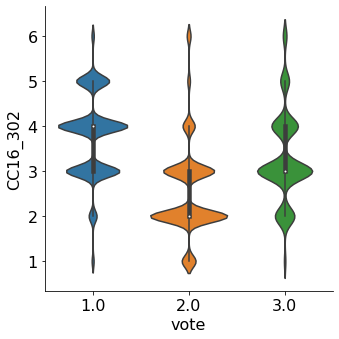

In [33]:
sns.catplot(x='vote', y='CC16_302', kind='violin', data=df)

---

Look for other categorical plots with seaborn and visualize the variables you chose above.

---

# weighted data

## vote

In [34]:
dfc.vote.value_counts(normalize=True).sort_index()*100

Trump      41.740853
Clinton    49.265557
Other       8.993590
Name: vote, dtype: float64

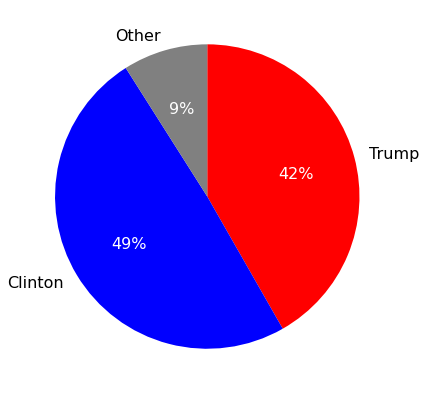

In [35]:
plt.figure(figsize = (7,7))
patches, texts, autotexts = plt.pie(dfc.vote.value_counts(normalize=True).sort_index(),
        colors=colors_3, counterclock=False, startangle=90, autopct='%1.0f%%', labels=dfc.vote.cat.categories)
for autotext in autotexts:
    autotext.set_color('white')

the popular vote 2016:
- 46.2% for Trump --> large difference to frequency above (42%)
- 48.2% for Clinton

In [36]:
print(dfc.commonweight_vv_post.sum()) # commonweight_vv_post: validated, post-election
dfc[dfc.commonweight_vv_post.notna()].shape # sum of weights equals number of observations

52942.00000000001


(52942, 564)

In [37]:
# pivot-table, alternative groupby with weight
display(pd.pivot_table(dfc, values='commonweight_vv_post', index='vote', aggfunc=sum)) # some error with categories
dfc.vote.replace(["I didn't vote in this election", "I'm not sure"], np.nan, inplace=True)

,commonweight_vv_post
vote,
Donald Trump (Republican),20462.264279
Hillary Clinton (Democrat),21571.807066
Gary Johnson (Libertarian),0.000000
Jill Stein (Green),0.000000
Other,2677.975498
I didn't vote in this election,59.184273
I'm not sure,128.057263
Evan McMullin (Independent),0.000000


In [38]:
pd.pivot_table(dfc, values='commonweight_vv_post', index='vote', aggfunc=sum)

,commonweight_vv_post
vote,
Trump,20462.264279
Clinton,21571.807066
Other,2677.975498


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


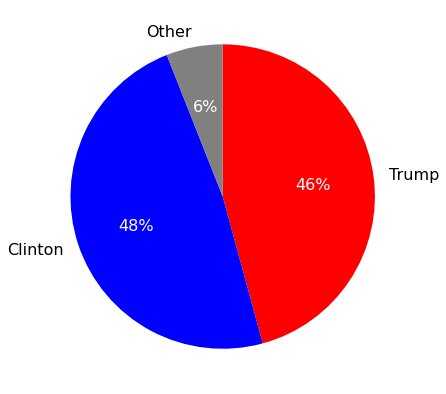

In [39]:
plt.figure(figsize = (7,7))
patches, texts, autotexts = plt.pie(pd.pivot_table(dfc, values='commonweight_vv_post', index='vote', aggfunc=sum),
        colors=colors_3, counterclock=False, startangle=90, autopct='%1.0f%%', labels=vote_label.values())
for autotext in autotexts:
    autotext.set_color('white')

In [40]:
# relative frequencies

totals = pd.pivot_table(dfc, values='commonweight_vv_post', index='vote', aggfunc=sum, margins=True)
totals.div(totals.loc['All'], axis=1) *100

,commonweight_vv_post
vote,
Trump,45.764544
Clinton,48.246074
Other,5.989382
All,100.000000


## other variables

In [41]:
# education by level of education

totals = pd.pivot_table(dfc, values='commonweight_vv_post', index='educ', columns='vote', aggfunc=sum, margins=True)
totals.div(totals.loc['All'], axis=1) *100

vote,Trump,Clinton,Other,All
educ,,,,
No HS,7.165687,6.547929,5.771309,6.784128
High school graduate,35.061885,27.163284,23.407719,30.553108
Some college,22.541167,22.973124,26.732502,23.000604
2-year,10.655953,10.408133,11.983982,10.615930
4-year,16.634109,20.222126,21.732685,18.670559
Post-grad,7.941199,12.685405,10.371804,10.375670
All,100.000000,100.000000,100.000000,100.000000


In [42]:
# education by candidate

totals.div(totals.All, axis=0) *100

vote,Trump,Clinton,Other,All
educ,,,,
No HS,48.338472,46.566315,5.095213,100.0
High school graduate,52.518101,42.893240,4.588659,100.0
Some college,44.850397,48.188430,6.961173,100.0
2-year,45.937080,47.301699,6.761221,100.0
4-year,40.772876,52.255434,6.971690,100.0
Post-grad,35.026685,58.986164,5.987150,100.0
All,45.764544,48.246074,5.989382,100.0


In [43]:
def weighted_frequency(colm):
    one = pd.pivot_table(dfc, values='commonweight_vv_post', index=colm, columns='vote', aggfunc=sum, margins=True)
    return one

def weighted_vote(colm):
    one = weighted_frequency(colm)
    pcol = one.div(one.All, axis=0) *100
    return pcol

def weighted_feature(colm):
    one = weighted_frequency(colm)
    prow = one.div(one.loc['All'], axis=1) *100
    return prow

In [44]:
weighted_vote('religpew')

vote,Trump,Clinton,Other,All
religpew,,,,
Protestant,58.115318,36.811933,5.072749,100.0
Roman Catholic,48.947115,46.807951,4.244934,100.0
Mormon,51.733203,23.514644,24.752153,100.0
Eastern or Greek Orthodox,59.720121,36.513848,3.766031,100.0
Jewish,27.537814,68.272967,4.189219,100.0
Muslim,14.103493,81.158005,4.738502,100.0
Buddhist,20.183930,65.749583,14.066487,100.0
Hindu,18.544290,81.253052,0.202659,100.0
Atheist,13.632877,78.204990,8.162132,100.0


In [45]:
weighted_feature('religpew').sort_values('All')

vote,Trump,Clinton,Other,All
religpew,,,,
Hindu,0.080204,0.333468,0.006692,0.197958
Eastern or Greek Orthodox,0.649285,0.376706,0.312625,0.497626
Muslim,0.159950,0.873414,0.410322,0.519095
Buddhist,0.327649,1.012808,1.743472,0.743006
Mormon,1.645999,0.709952,6.013105,1.456293
Jewish,1.413402,3.325185,1.641705,2.349228
Something else,4.388683,5.863071,6.750718,5.241443
Atheist,1.724869,9.389312,7.884932,5.791051
Agnostic,2.976727,8.255759,7.792399,5.811725


## Visualization

Text(0, 0.5, '')

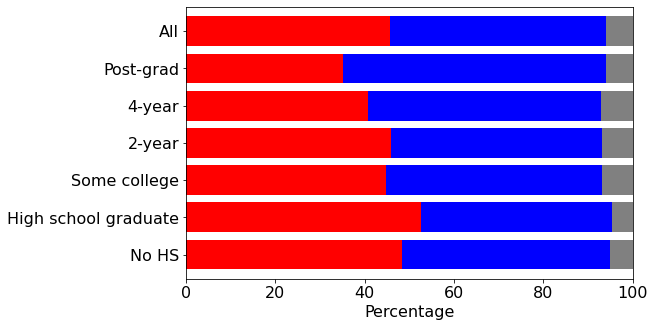

In [46]:
weighted_vote('educ').plot(kind='barh', stacked=True, color=colors_3, legend=False, xlim=(0,100), width=0.8, figsize=(8,5))
plt.xlabel('Percentage')
plt.ylabel('')

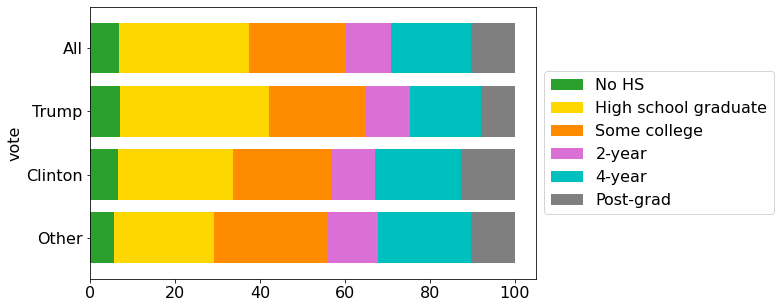

In [47]:
ax = weighted_feature('educ').iloc[:-1][['Other', 'Clinton', 'Trump', 'All']].transpose().plot(kind='barh', stacked=True, color=colorm, rot=360, ylim=(0,100), width=0.8, figsize=(8,5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

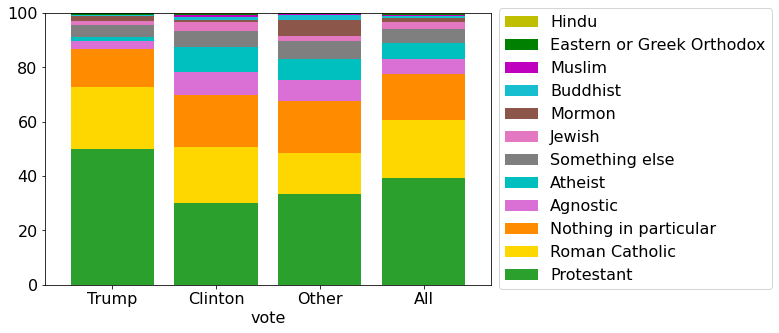

In [48]:
ax = weighted_feature('religpew').iloc[:-1].sort_values('All', ascending=False).transpose().plot(kind='bar', stacked=True, color=colorm, rot=360, ylim=(0,100), width=0.8, figsize=(8,5))
handles, labels2 = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels2), loc='center left', bbox_to_anchor=(1.0, 0.5))

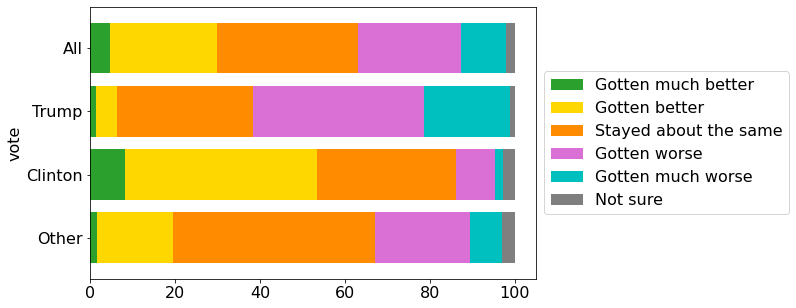

In [49]:
ax = weighted_feature('CC16_302').iloc[:-1][['Other', 'Clinton', 'Trump', 'All']].transpose().plot(kind='barh', stacked=True, color=colorm, rot=360, ylim=(0,100), width=0.8, figsize=(8,5))
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

---

Calculate the relative frequencies according to the voting outcome and visualize them for the variables of your interest.

---